<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week11/simple_neural_network_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network Exercise
- Michael Vincent
- 8/25

## Imports

In [64]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load the data

In [65]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQPIHj2zduhCmXT44ZMBjUJ6d0CaFmEIheo4D0k-4jJGD-po7W-mebgUCYxxzVfpi3qLI_vKwOp4U3F/pub?output=csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Clean the data

In [66]:
# Check for duplicates and missing values
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 0


In [67]:
# Check for inconsistent labels
cat_cols = df.select_dtypes(include = 'object')
for col in cat_cols:
  print(col)
  print(df[col].value_counts())

Sex
M    725
F    193
Name: Sex, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [68]:
# Check the balance
df['HeartDisease'].mean()

0.5533769063180828

> Data looks reasonably clean. We will move on to modeling.

## Process the data

In [69]:
# Set the features and target
X = df.drop(columns = 'HeartDisease')
y = df['HeartDisease']

In [70]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Column Transformer

In [71]:
# Make column selectors
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [72]:
# Make tuples for the column selector
cat_tuple = (OneHotEncoder(sparse = False, handle_unknown = 'ignore'), cat_selector)
num_tuple = (StandardScaler(), num_selector)

In [73]:
# Construct the column transformer
col_transformer = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [74]:
# Transform the data
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.fit_transform(X_test)

## Model Construction

In [75]:
# Get the number of nodes for the input layer
input_nodes = X_train.shape[1]
input_nodes

20

In [76]:
# Instantiate a model
model = Sequential()

In [77]:
# Add the first hidden layer
model.add(Dense(10, 
                input_dim = input_nodes,
                activation = 'relu'))

In [78]:
# Add another hidder layer
model.add(Dense(10, activation = 'relu'))

In [79]:
# Add the output layer
model.add(Dense(1, activation = 'sigmoid'))

In [80]:
# Compile the model
model.compile(loss = 'bce', optimizer = 'adam')

In [81]:
# Fit the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs = 50)

Epoch 1/50
22/22 [==============================] - 1s 9ms/step - loss: 0.6026 - val_loss: 0.5587
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5303 - val_loss: 0.4954
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4708 - val_loss: 0.4447
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4281 - val_loss: 0.4064
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 0.3988 - val_loss: 0.3813
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.3783 - val_loss: 0.3696
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.3644 - val_loss: 0.3563
Epoch 8/50
22/22 [==============================] - 0s 3ms/step - loss: 0.3535 - val_loss: 0.3478
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 0.3449 - val_loss: 0.3428
Epoch 10/50
22/22 [==============================] - 0s 4ms/step - loss: 0.3384 - val_loss: 0.3394
Epoch 11/50
22/22 [

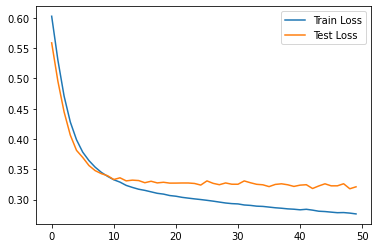

In [82]:
# Plot the history
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()